In [94]:
import pandas as pd
import numpy as np
from IPython.display import Image

In [95]:
df = pd.read_csv("./water_potability.csv")

In [96]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [97]:
np.shape(df)

(104832, 10)

In [98]:
print("Number of null values in different columns")
print(df.isna().sum())

Number of null values in different columns
ph                 15712
Hardness               0
Solids                 0
Chloramines            0
Sulfate            24992
Conductivity           0
Organic_carbon         0
Trihalomethanes     5184
Turbidity              0
Potability             0
dtype: int64


In [99]:
print("Number of null values in different columns")
print(df.isna().sum())

Number of null values in different columns
ph                 15712
Hardness               0
Solids                 0
Chloramines            0
Sulfate            24992
Conductivity           0
Organic_carbon         0
Trihalomethanes     5184
Turbidity              0
Potability             0
dtype: int64


In [100]:
df=df.dropna()
# df["ph"].fillna(value = df["ph"].mean(),inplace=True)
# df["Sulfate"].fillna(value = df["Sulfate"].mean(),inplace=True)
# df["Trihalomethanes"].fillna(value = df["Trihalomethanes"].mean(),inplace=True)

In [101]:
df.shape

(64352, 10)

In [102]:
x = pd.DataFrame(df,columns = ['ph', 'Hardness','Solids', 'Chloramines','Sulfate', 'Conductivity','Organic_carbon', 'Trihalomethanes',"Turbidity"])
y = pd.DataFrame(df,columns = ["Potability"])

In [103]:

df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,64352.000000,64352.000000,64352.000000,64352.000000,64352.000000,64352.000000,64352.000000,64352.000000,64352.000000,64352.000000
mean,7.085990,195.968072,21917.441375,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729,0.403282
std,1.572958,32.627223,8640.157938,1.584438,41.195246,80.693129,3.324158,16.073237,0.780158,0.490560
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,6.089431,176.736376,15613.160530,6.137757,307.621462,366.558131,12.120956,55.947322,3.442848,0.000000
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177,0.000000
75%,8.053044,216.454108,27192.280560,8.110140,359.392567,482.451933,16.684074,77.297300,4.515150,1.000000
max,14.000000,317.338124,56488.672410,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


In [104]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest  


bestfeatures = SelectKBest(score_func = chi2, k=5)
fit = bestfeatures.fit(x,y)
fit.scores_
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featurescore = pd.concat([dfcolumns,dfscores],axis=1)
featurescore.columns = ['feature' , 'relevance']
featurescore.sort_values(by='relevance',ascending=False)

,feature,relevance
2,Solids,362615.588772
5,Conductivity,235.888170
4,Sulfate,76.749220
7,Trihalomethanes,21.395304
6,Organic_carbon,12.001759
3,Chloramines,9.781242
8,Turbidity,5.076188
0,ph,4.743756
1,Hardness,0.791799


/tmp/ipykernel_6565/1926883341.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RandomForestClassifier().fit(x,y)


<BarContainer object of 9 artists>

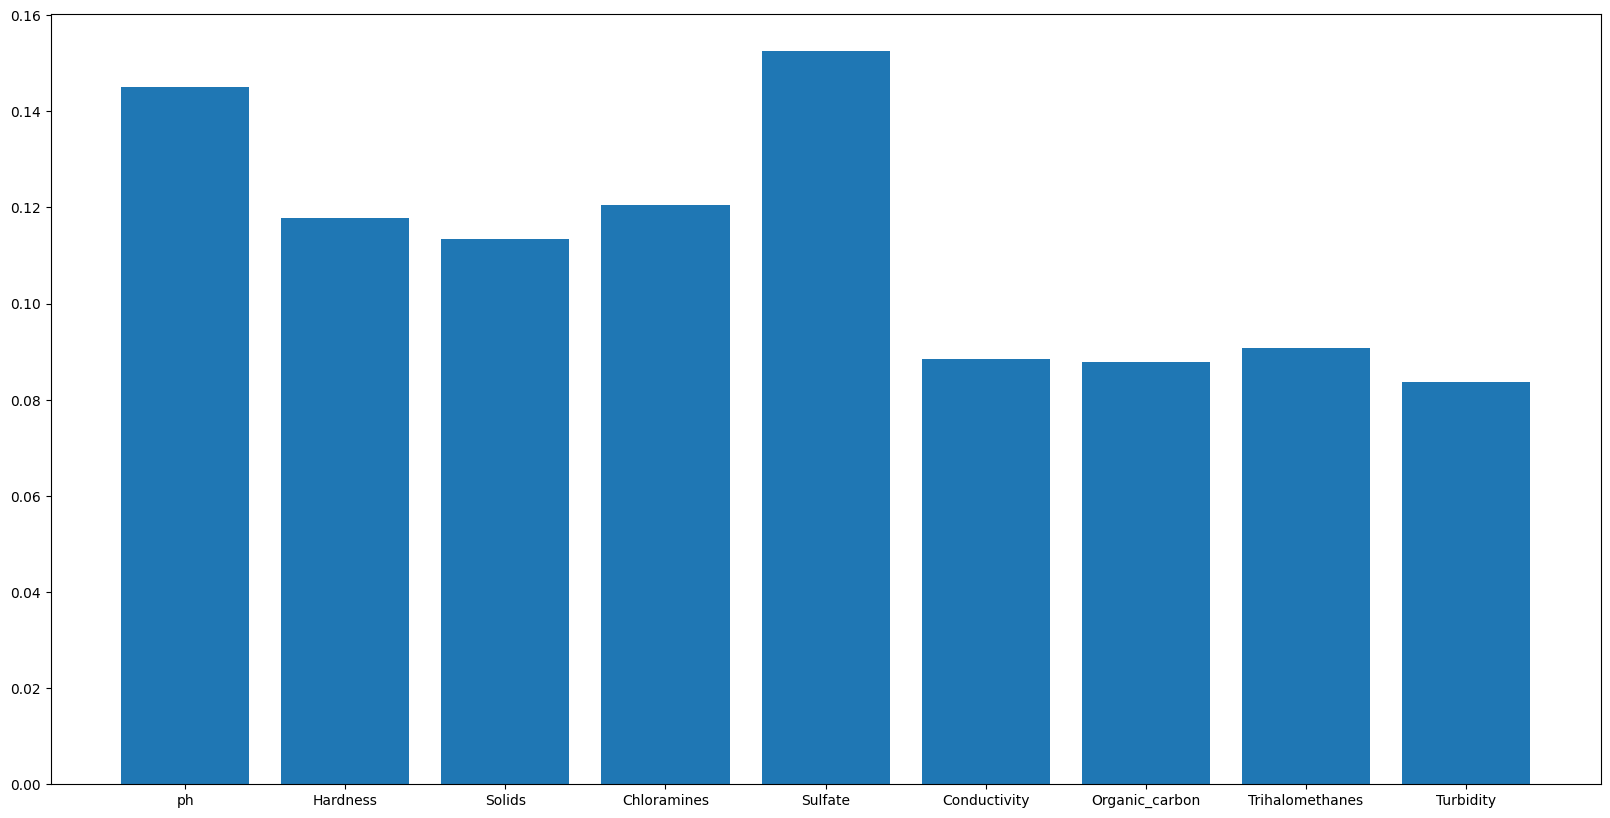

In [105]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier().fit(x,y)
model.feature_importances_  
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10)) 
featuresimp = pd.DataFrame(model.feature_importances_, index = x.columns, columns=['importance'])
featureimp = featuresimp.sort_values(by='importance',ascending=False)
plt.bar(featuresimp.index, featuresimp['importance'])

<AxesSubplot: >

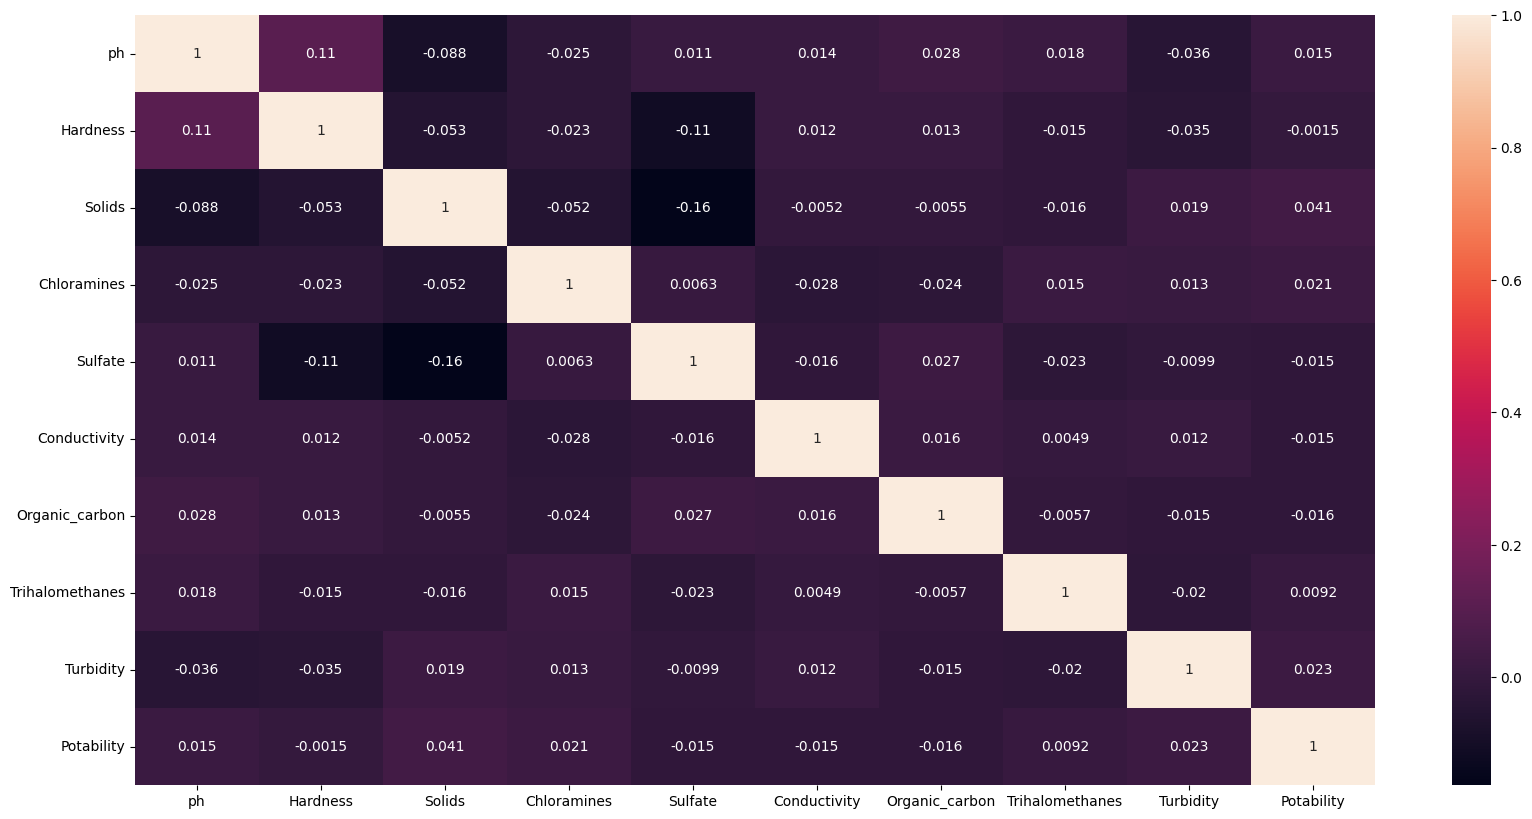

In [106]:
import seaborn as sns

plt.figure(figsize=(20,10)) 
datacor = df.corr()
sns.heatmap(datacor,annot=True)

In [107]:
df.reset_index(inplace=True)
df=df.drop(['index'],axis=1)
# df=df.drop(['Hardness'],axis=1)
# df=df.drop(['Sulfate'],axis=1)
df.groupby("Potability").count()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Potability,,,,,,,,,
0,38400,38400,38400,38400,38400,38400,38400,38400,38400
1,25952,25952,25952,25952,25952,25952,25952,25952,25952


In [108]:
y = df['Potability']
X = df.drop(['Potability'],axis=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# from sklearn.decomposition import PCA
# pca = PCA(n_components=5) 
# X = pca.fit_transform(X1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)
print('Size Training Set: {}'.format(len(X_train)))
print('Size Testing Set: {}'.format(len(X_test)))

Size Training Set: 57916
Size Testing Set: 6436


In [109]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dense, Dropout, Activation
early_stopping = EarlyStopping(monitor="val_loss",mode = 'auto',patience=15)
#test 1

model = keras.Sequential()
model.add(layers.Dense(256,input_dim=9, activation='relu'))

model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.1, noise_shape=None, seed=None))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(1))

opt = keras.optimizers.Adamax()
model.compile(loss='mean_squared_error', optimizer=opt,metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=75, epochs=50, validation_data=(X_test, y_test),callbacks=[early_stopping])
# history = model.fit(X_train, y_train, batch_size=75, epochs=400, validation_data=(X_test, y_test))

Epoch 1/50
773/773 [==============================] - 3s 3ms/step - loss: 0.2093 - accuracy: 0.6774 - val_loss: 0.1706 - val_accuracy: 0.7466
Epoch 2/50
773/773 [==============================] - 2s 3ms/step - loss: 0.1809 - accuracy: 0.7315 - val_loss: 0.1447 - val_accuracy: 0.7924
Epoch 3/50
773/773 [==============================] - 2s 3ms/step - loss: 0.1608 - accuracy: 0.7695 - val_loss: 0.1227 - val_accuracy: 0.8254
Epoch 4/50
773/773 [==============================] - 2s 2ms/step - loss: 0.1442 - accuracy: 0.7993 - val_loss: 0.1017 - val_accuracy: 0.8715
Epoch 5/50
773/773 [==============================] - 2s 2ms/step - loss: 0.1307 - accuracy: 0.8220 - val_loss: 0.0836 - val_accuracy: 0.9040
Epoch 6/50
773/773 [==============================] - 2s 2ms/step - loss: 0.1176 - accuracy: 0.8439 - val_loss: 0.0667 - val_accuracy: 0.9295
Epoch 7/50
773/773 [==============================] - 2s 2ms/step - loss: 0.1057 - accuracy: 0.8630 - val_loss: 0.0506 - val_accuracy: 0.9554
Epoch 

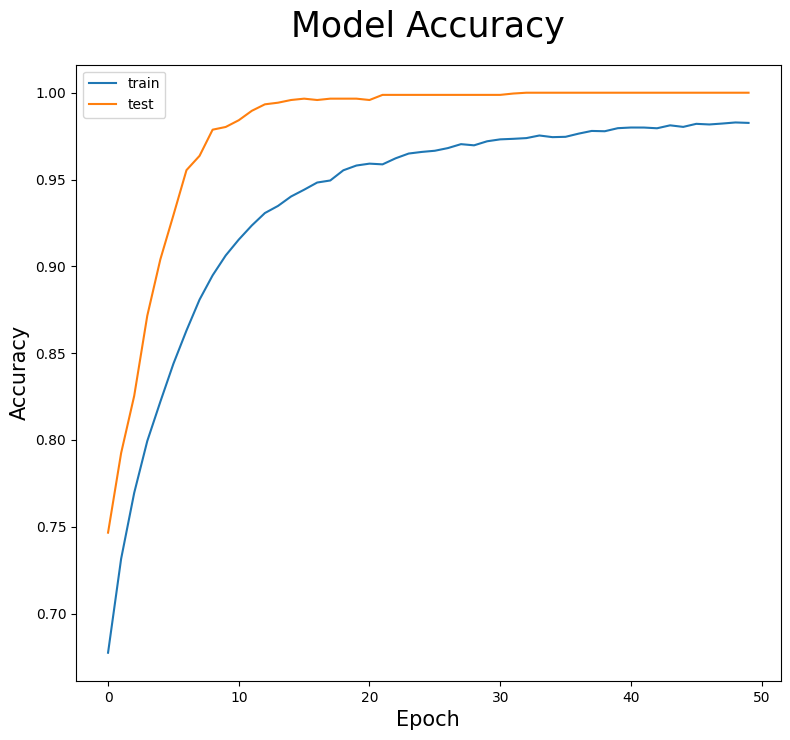

In [110]:
plt.figure(figsize=[20,8])

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', size=25, pad=20)
plt.ylabel('Accuracy', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')

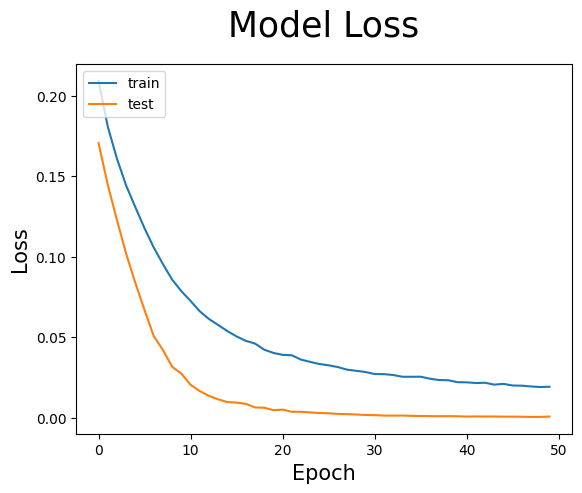

In [111]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', size=25, pad=20)
plt.ylabel('Loss', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')

In [112]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

202/202 [==============================] - 0s 1ms/step


In [113]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

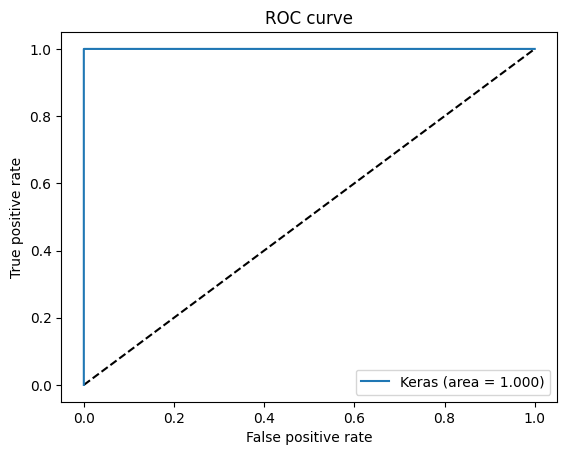

In [114]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [115]:
y_pred = model.predict(X_test)
y_pred = y_pred > 0.5

202/202 [==============================] - 0s 1ms/step


In [116]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [117]:
import seaborn as sns

Text(0.5, 23.52222222222222, 'Predicted label')

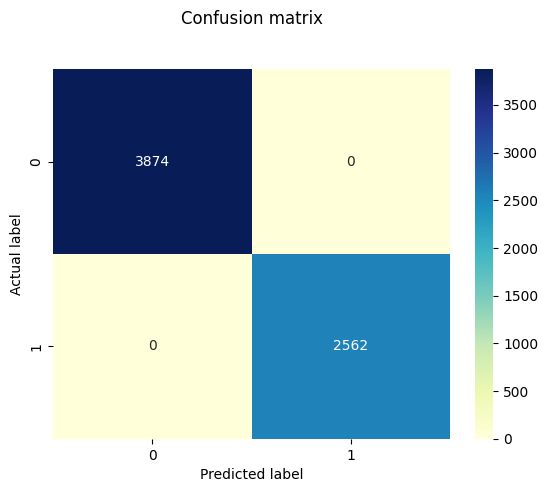

In [118]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')